# コレスポンデンス分析
Multiple Correspondence Analysis

コレスポンデンス分析（対応分析）は、多変量解析の手法のひとつで、アンケート調査結果のクロス集計表から、カテゴリーデータの関連性を散布図の形で大掴みに可視化する目的で使われるものです。

Pythonでは、MCAというパッケージがあるので、これを利用します。
https://pypi.org/project/mca/

このサンプルでは、４つの企業の製品を対象に、当該製品の購入者に対して、その購買動機を 機能・形・色・ブランド・価格の５項目から複数選択で回答してもらった結果を集計した表データを利用します。

https://github.com/koichi-inoue/DataScience/blob/main/mca_sample.csv

In [ ]:
# mca のインストール
!pip install mca

In [67]:
# ライブラリの読み込み
import mca
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# クロス集計データの取得
df = pd.read_csv('https://raw.githubusercontent.com/koichi-inoue/DataScience/main/mca_sample.csv', index_col=0, header=0 )
df

,Function,Shape,Color,Brand,Price
Company,,,,,
A,10,5,3,4,7
B,5,1,4,2,10
C,8,10,6,5,2
D,2,6,5,6,1


In [69]:
# コレスポンデンス分析
mca_counts = mca.MCA(df, benzecri=False)

In [70]:
# 結果の抜き出し（2次元の表示：N=2）
rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2)

# 表側、表頭が２次元に配列になっていることを確認
print('raws=', rows)
print('cols=', cols)

raws= [[-0.20785759 -0.20758728]
 [-0.68606375  0.19320345]
 [ 0.34318083 -0.13143804]
 [ 0.52413334  0.29220673]]
cols= [[-0.15209922 -0.30671144]
 [ 0.48886454 -0.0897058 ]
 [ 0.16158205  0.22217435]
 [ 0.34651618  0.18651922]
 [-0.78758957  0.12356743]]


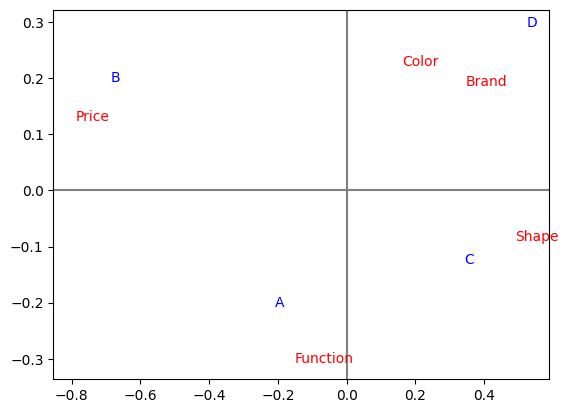

In [78]:
# 表側（企業）のプロット
plt.scatter( rows[:,0], rows[:,1], marker="None")
labels = df.index
for label,x,y in zip(labels,rows[:,0],rows[:,1]):
  plt.annotate(label,xy = (x, y), c="b")

# 表頭（購入動機）のプロット
plt.scatter(cols[:, 0], cols[:, 1], marker="None")
labels = df.columns
for label, x, y in zip(labels, cols[:, 0], cols[:, 1]):
  plt.annotate(label, xy=(x, y), c="r")

# xy軸の表示
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')

### 分布の見方
* 青文字が表側（企業）で、赤文字が表頭（購買動機）
* プロットされた位置が近いほど、項目間の関連性が強い
* 分布は、中央から遠ざかるほど特徴的
* 横軸と縦軸の意味づけは分析者が任意に行うもの

### 結果からわかること
* 横軸：価格重視（左）か、高級ブランド志向（右）か
* 縦軸：見た目重視（上）か、機能重視（下）か
* A社の商品は、機能重視で選ばれている
* B社の商品は、価格（お手頃感）で選ばれている
* C社の商品は、形の良さで選ばれている
* D社の商品は、ブランド力と色使いの良さで選ばれている